<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ</a></span></li><li><span><a href="#Обучение-и-тестирование" data-toc-modified-id="Обучение-и-тестирование-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение и тестирование</a></span><ul class="toc-item"><li><span><a href="#Первый-вариант-признаков" data-toc-modified-id="Первый-вариант-признаков-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Первый вариант признаков</a></span><ul class="toc-item"><li><span><a href="#Модель-линейной-регрессии" data-toc-modified-id="Модель-линейной-регрессии-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Модель линейной регрессии</a></span></li><li><span><a href="#Модель-регрессии-Случайный-лес" data-toc-modified-id="Модель-регрессии-Случайный-лес-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Модель регрессии Случайный лес</a></span></li><li><span><a href="#Модель-регрессии-градиентного-бустинга" data-toc-modified-id="Модель-регрессии-градиентного-бустинга-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>Модель регрессии градиентного бустинга</a></span></li></ul></li><li><span><a href="#Второй-вариант-признаков" data-toc-modified-id="Второй-вариант-признаков-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Второй вариант признаков</a></span><ul class="toc-item"><li><span><a href="#Модель-линейной-регрессии" data-toc-modified-id="Модель-линейной-регрессии-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Модель линейной регрессии</a></span></li><li><span><a href="#Модель-регрессии-Случайный-лес" data-toc-modified-id="Модель-регрессии-Случайный-лес-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Модель регрессии Случайный лес</a></span></li><li><span><a href="#Модель-регрессии-градиентного-бустинга" data-toc-modified-id="Модель-регрессии-градиентного-бустинга-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>Модель регрессии градиентного бустинга</a></span></li></ul></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Выводы</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

#  Прогнозирование заказов такси

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Постройте модель для такого предсказания.

Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

Вам нужно:

1. Загрузить данные и выполнить их ресемплирование по одному часу.
2. Проанализировать данные.
3. Обучить разные модели с различными гиперпараметрами. Сделать тестовую выборку размером 10% от исходных данных.
4. Проверить данные на тестовой выборке и сделать выводы.


Данные лежат в файле `taxi.csv`. Количество заказов находится в столбце `num_orders` (от англ. *number of orders*, «число заказов»).

## Подготовка

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.dummy import DummyRegressor
from lightgbm import LGBMRegressor
import warnings

In [90]:
data = pd.read_csv('/datasets/taxi.csv', index_col=[0], parse_dates=[0])
data.sort_index(inplace=True) 
data = data.resample('1h').sum() # ресемплирование заказов в сумме по одному часу 
data['rolling_mean'] = data['num_orders'].rolling(10).mean() # применим скользящее среднее
data['std'] = data['num_orders'].rolling(15).std() # стандартное отклонение по скользящему окну
display(data.head(20))
data.info()
data_info = data

In [91]:
# Удалим первые 15 строк с пропусками
data = data['2018-03-01 14:00:00':]

Ресемплировали данные по 1 часу.

Добавили в данные столбец со скользящим средним значением и с отклонением по скользящему среднему окну.

В исходных даных пропусков не было. После добавления столбцов со скользящим средним и с отклонением по скользящему окну появились строки с пропусками, которые мы удалили. Теперь в данных пропусков не наблюдается. Можно переходить к анализу.

## Анализ

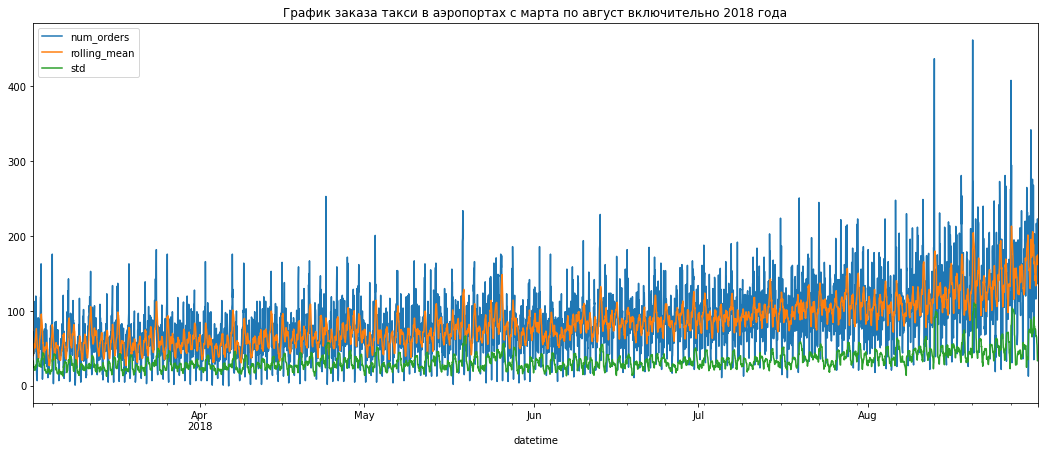

In [92]:
data.plot(figsize=(18,7))
plt.title("График заказа такси в аэропортах с марта по август включительно 2018 года")
plt.show()

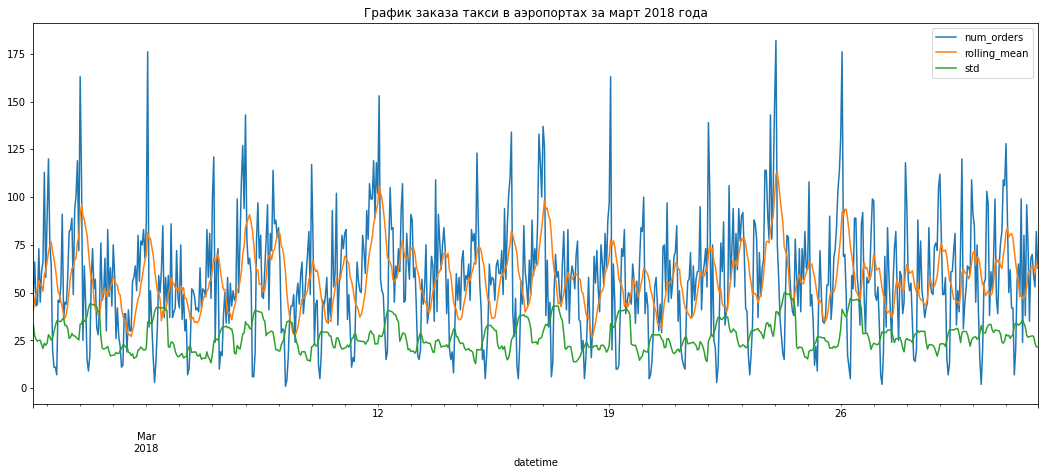

In [93]:
data['2018-03-01':'2018-03-31'].plot(figsize=(18,7)) 
plt.title("График заказа такси в аэропортах за март 2018 года")
plt.show()

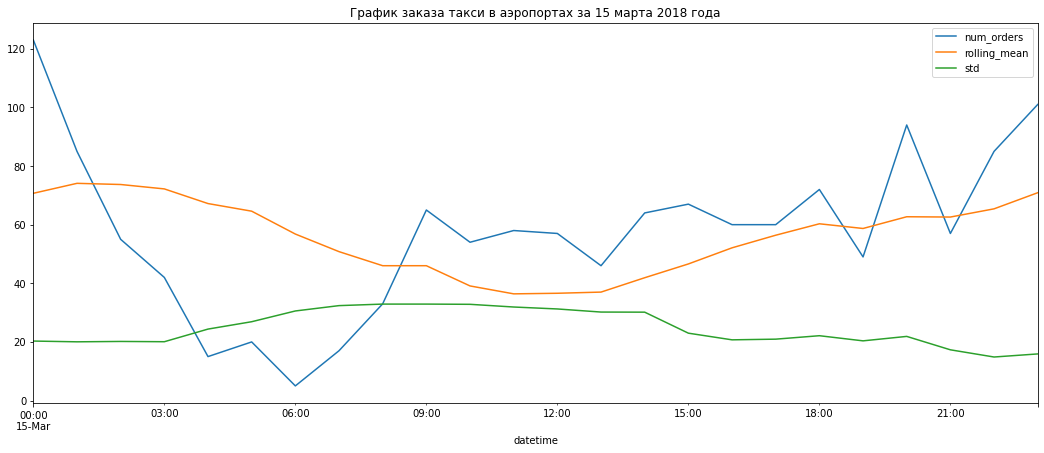

In [94]:
data['2018-03-15':'2018-03-15'].plot(figsize=(18,7)) 
plt.title("График заказа такси в аэропортах за 15 марта 2018 года")
plt.show()

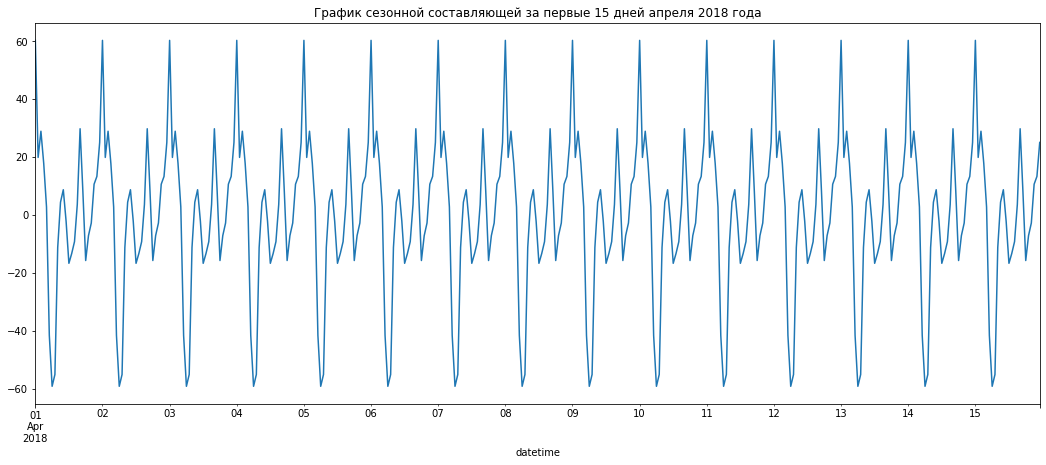

In [95]:
decomposed = seasonal_decompose(data['num_orders'])
decomposed.seasonal['2018-04-01':'2018-04-15'].plot(ax=plt.gca(), figsize=(18,7))
plt.title("График сезонной составляющей за первые 15 дней апреля 2018 года")
plt.show()

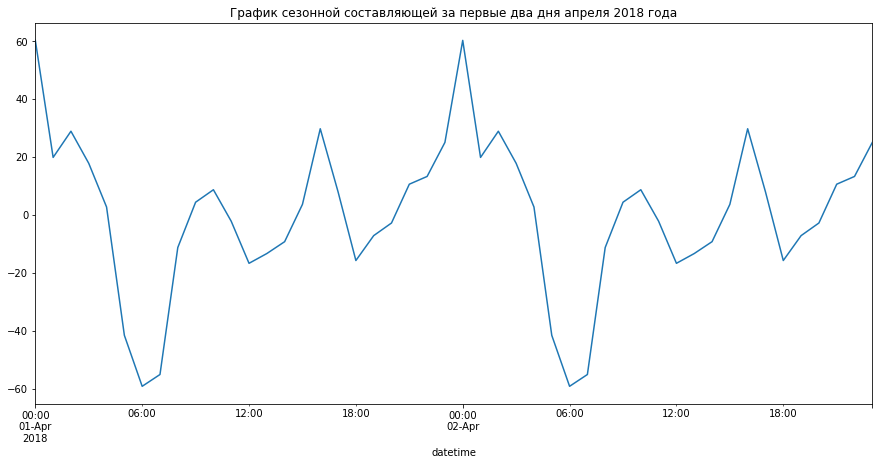

In [96]:
decomposed.seasonal['2018-04-01':'2018-04-02'].plot(ax=plt.gca(), figsize=(15,7))
plt.title("График сезонной составляющей за первые два дня апреля 2018 года")
plt.show()

Для примера выше выведены графики заказов такси за весь представленный период (пол года), случайный месяц и случайный день.
Также, представлен график сезонной составляющей случайного периода в 15 дней. В течение дня сезонной составляющей не наблюдается, примерный цикл сезонной составляющей представлен в течение суток.

График за весь представленный период представляет собой нестационарный временной ряд, т.к. его временное среднее значение со временем растет. Однако, в данных за месяц временной ряд выглядит более стационарным. 
Попробуем сделать предсказания на представленных данных.

## Обучение и тестирование

Данные представлены за год, в цикле года месяц и год будто вырваны из контекста, поэтому не дают полной картины сезонности, а значит не дадут корректного предсказания. 

В разные дни недели показатели также варьируются, но если брать только один условный день особенной информации он нам не даст, поэтому не стоит его здесь учитывать фактор - день.

Следовательно, для моделирования выберем только факторы: час и день недели,  параметр авторегрессии, rolling - аналог тренда.

In [97]:
# Создание признаков

def make_features(data, max_lag, rolling_mean_size):
    data['dayofweek'] = data.index.dayofweek
    data['hour'] = data.index.hour
    
    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data['num_orders'].shift(lag)

    data['rolling_mean'] = data['num_orders'].shift().rolling(rolling_mean_size).mean()

### Первый вариант признаков

Следует уточнить, что для прогноза на более длительный период потребуются все виды сезонности, а следовательно данные не за один год. 

Для поставленной задачи используем только два вида сезонностей.

In [98]:
make_features(data, 4, 4)

warnings.filterwarnings('ignore')
data = data['2018-03-01 18:00:00':] # Удалим строки с пустыми значениями "lag"

По исходным данным создадим обучающую (train) и тестовую (test) выборки. Перемешивать выборки в задаче прогнозирования временного ряда нельзя. Данные обучающей выборки должны предшествовать данным тестовой. Иначе тестирование модели будет некорректным: модель не должна обучаться на данных из будущего.

In [99]:
# Сделаем тестовую выборку размером 10% от исходных данных
train, test = train_test_split(data, shuffle=False, test_size=0.1) 

train_X = train.drop('num_orders', axis = 1)
train_y = train['num_orders']
 
test_X = test.drop('num_orders', axis = 1)
test_y = test['num_orders']

# Убедимся в корректности деления
print(train.index.min(), train.index.max()) # минимальные значения индексов выборок 
print(test.index.min(), test.index.max()) # максимальные значения индексов выборок 

#### Модель линейной регрессии

In [100]:
# Обучим линейную регрессию

model = LinearRegression()
model.fit(train_X,train_y)

# Протестируем линейную регрессию
pred_test = model.predict(test_X)
pred_train = model.predict(train_X)

print("RMSE обучающей выборки:", mean_squared_error(train_y, pred_train)** 0.5)
print("RMSE тестовой выборки: ", mean_squared_error(test_y, pred_test)** 0.5)

#### Модель регрессии Случайный лес

In [101]:
# Расчет RMSE для модели регрессии Случайный лес с рендомными настройками

model = RandomForestRegressor(n_estimators=35, max_depth=5, random_state=12345)
model.fit(train_X,train_y) # обучим модель

# Протестируем Случайный лес
pred_test = model.predict(test_X)
pred_train = model.predict(train_X)

print("RMSE обучающей выборки:", mean_squared_error(train_y, pred_train)** 0.5)
print("RMSE тестовой выборки: ", mean_squared_error(test_y, pred_test)** 0.5)

In [102]:
# Поиск лучших параметров модели Случайный лес
model = RandomForestRegressor(random_state=12345)

parametrs = { 'n_estimators': range (1, 10, 5),
              'max_depth': range (1,13, 2), }
grid = GridSearchCV(model,parametrs,cv = 3)
grid = RandomizedSearchCV(model, parametrs, cv=5)
grid.fit(train_X,train_y)

grid.best_params_

In [103]:
# Расчет RMSE для модели регрессии Случайный лес с измененными настройками

model = RandomForestRegressor(n_estimators=6, max_depth=11, random_state=12345)
model.fit(train_X,train_y) # обучим модель
 
pred_test = model.predict(test_X)
pred_train = model.predict(train_X)

print("RMSE обучающей выборки:", mean_squared_error(train_y, pred_train)** 0.5)
print("RMSE тестовой выборки: ", mean_squared_error(test_y, pred_test)** 0.5)

#### Модель регрессии градиентного бустинга

In [104]:
# Обучение модели градиентного бустинга
model = LGBMRegressor()
model.fit(train_X,train_y)

# Расчет RMSE для модели градиентного бустинга с настройками по умолчанию
pred_test = model.predict(test_X)
pred_train = model.predict(train_X)

print("RMSE обучающей выборки:", mean_squared_error(train_y, pred_train)** 0.5)
print("RMSE тестовой выборки: ", mean_squared_error(test_y, pred_test)** 0.5)

In [105]:
# Поиск лучших параметров для модели градиентного бустинга
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [-1, 3, 5],
    'n_estimators': [50, 100, 200, 500],
}

grid = GridSearchCV(lgb.LGBMRegressor(random_state=0), params, cv=5)
grid.fit(train_X,train_y)

reg = lgb.LGBMRegressor(random_state=0)

grid.best_params_

In [106]:
# Обучение модели градиентного бустинга с измененными настройками
model = LGBMRegressor(max_depth=-1, n_estimators=50)
model.fit(train_X,train_y)

# Расчет RMSE для модели градиентного бустинга с измененными настройками
pred_test = model.predict(test_X)
pred_train = model.predict(train_X)

print("RMSE обучающей выборки:", mean_squared_error(train_y, pred_train)** 0.5)
print("RMSE тестовой выборки: ", mean_squared_error(test_y, pred_test)** 0.5)

### Второй вариант признаков

In [107]:
make_features(data, 81, 81)

warnings.filterwarnings('ignore')
data = data['2018-03-05 10:00:00':] # Удалим строки с пустыми значениями "lag"

In [108]:
# Сделаем тестовую выборку размером 10% от исходных данных
train, test = train_test_split(data, shuffle=False, test_size=0.1) 

train_X = train.drop('num_orders', axis = 1)
train_y = train['num_orders']
 
test_X = test.drop('num_orders', axis = 1)
test_y = test['num_orders']

# Убедимся в корректности деления
print(train.index.min(), train.index.max()) # минимальные значения индексов выборок 
print(test.index.min(), test.index.max()) # максимальные значения индексов выборок 

#### Модель линейной регрессии

In [109]:
# Обучим линейную регрессию с учётом новых признаков

model = LinearRegression()
model.fit(train_X,train_y)

# Протестируем модель Линейной регрессии
pred_test = model.predict(test_X)
pred_train = model.predict(train_X)

print("RMSE обучающей выборки:", mean_squared_error(train_y, pred_train)** 0.5)
print("RMSE тестовой выборки: ", mean_squared_error(test_y, pred_test)** 0.5)

#### Модель регрессии Случайный лес

In [110]:
# Расчет RMSE для модели регрессии Случайный лес с рендомными настройками

model = RandomForestRegressor(n_estimators=35, max_depth=5, random_state=12345)
model.fit(train_X,train_y) # обучим модель
 
pred_test = model.predict(test_X)
pred_train = model.predict(train_X)

print("RMSE обучающей выборки:", mean_squared_error(train_y, pred_train)** 0.5)
print("RMSE тестовой выборки: ", mean_squared_error(test_y, pred_test)** 0.5)

In [111]:
# Поиск лучших параметров модели Случайный лес
model = RandomForestRegressor(random_state=12345)

parametrs = { 'n_estimators': range (1, 10, 5),
              'max_depth': range (1,13, 2), }
grid = GridSearchCV(model,parametrs,cv = 3)
grid = RandomizedSearchCV(model, parametrs, cv=5)
grid.fit(train_X,train_y)

grid.best_params_

In [112]:
# Расчет RMSE для модели регрессии Случайный лес с измененными настройками

model = RandomForestRegressor(n_estimators=6, max_depth=9, random_state=12345)
model.fit(train_X,train_y) # обучим модель
 
pred_test = model.predict(test_X)
pred_train = model.predict(train_X)

print("RMSE обучающей выборки:", mean_squared_error(train_y, pred_train)** 0.5)
print("RMSE тестовой выборки: ", mean_squared_error(test_y, pred_test)** 0.5)

#### Модель регрессии градиентного бустинга

In [113]:
# Обучение модели градиентного бустинга
model = LGBMRegressor()
model.fit(train_X,train_y)

# Расчет RMSE для модели градиентного бустинга с настройками по умолчанию
pred_test = model.predict(test_X)
pred_train = model.predict(train_X)

print("RMSE обучающей выборки:", mean_squared_error(train_y, pred_train)** 0.5)
print("RMSE тестовой выборки: ", mean_squared_error(test_y, pred_test)** 0.5)

In [114]:
# Поиск лучших параметров для модели градиентного бустинга
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [-1, 3, 5],
    'n_estimators': [50, 100, 200, 500],
}

grid = GridSearchCV(lgb.LGBMRegressor(random_state=0), params, cv=5)
grid.fit(train_X,train_y)

reg = lgb.LGBMRegressor(random_state=0)

grid.best_params_

In [115]:
# Обучение модели градиентного бустинга с измененными настройками
model = LGBMRegressor(max_depth=-1, n_estimators=200)
model.fit(train_X,train_y)

# Расчет RMSE для модели градиентного бустинга с измененными настройками
pred_test = model.predict(test_X)
pred_train = model.predict(train_X)

print("RMSE обучающей выборки:", mean_squared_error(train_y, pred_train)** 0.5)
print("RMSE тестовой выборки: ", mean_squared_error(test_y, pred_test)** 0.5)

## Выводы

Ниже представлена сводная таблица по полученным показателям:

In [116]:
models = ['LinearRegression', 'RandomForestRegressor', 'LGBMRegressor']

features_1 = ['4, 4', '4, 4', '4, 4']
RMSE_train_1 = [31.5, 15.2, 12.5]
RMSE_test_1 = [54.4, 48.0, 45.2]

features_2 = ['81, 81', '81, 81', '81, 81']
RMSE_train_2 = [22.5, 15.6, 5.8]
RMSE_test_2 = [40.5, 43.9, 38.4]

df = pd.DataFrame({'models': models,'features_1': features_1,'RMSE_train_1': RMSE_train_1, 'RMSE_test_1': RMSE_test_1,
                   'features_2': features_2, 'RMSE_train_2': RMSE_train_2, 'RMSE_test_2': RMSE_test_2,})

display(df)

Предсказания по тестовой выборке получаются точнее при большем количестве признаков.
Для тренировочной выборки более точные предсказания с большим количеством признаков дают 2 модели из 3-х рассмотренных.

Лучше всего себя проявила модель градиентного бустинга LGBMRegressor при большем количестве признаков.

Высокий RMSE на тестовой выборке в отличие от тренировочного RMSE можно объяснить тем, что тестовая выборка представляет собой конечную часть во временном ряду, где график временного среднего значения количества заказов такси "ползет" вверх и является менее стационарным временным рядом в отличие от более ранних показателей. Это можно увидеть на графике ниже.

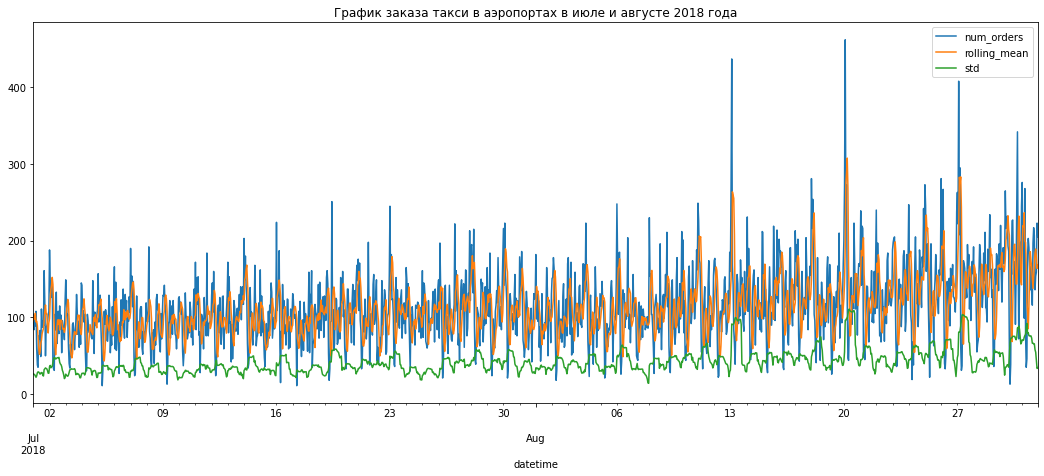

In [117]:
data_info['2018-07-01':'2018-08-31'].plot(figsize=(18,7))
plt.title("График заказа такси в аэропортах в июле и августе 2018 года")
plt.show()